***
# Exercise: Web Scraping
***




*By Asmik Nalmpatian and Lisa Wimmer – for Intro to NLP*

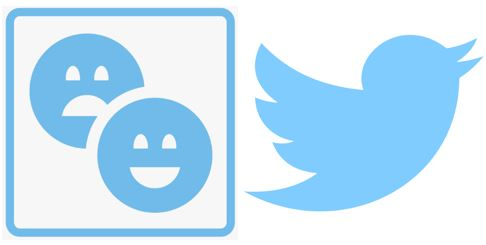

## Set-up

Check: `Runtime type = R`?

➡ If not, re-launch Google Colab via https://colab.to/r and upload this notebook there.



## Exercise 1: Web Scraping (General Purpose)

#### Task

https://practicewebscrapingsite.wordpress.com/example-1/ provides an introductory example to web scraping.

Extract the titles and texts and save them to a `data.frame`.

*Packages*

In [ ]:
# Install all required packages:

install.packages("rvest") # scraping
install.packages("tidyverse") # general data handling

In [ ]:
# Load all required packages:

library(rvest)
library(tidyverse)

*Solution*

In [ ]:
# Parse website contents

website_contents <- rvest::read_html(
  "https://practicewebscrapingsite.wordpress.com/example-1")
website_contents

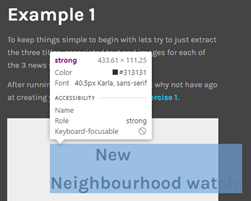

In [ ]:
# Extract title info --> elements with class "strong" 
# (revealed by, e.g., developer tab or SelectorGadget)

titles <- website_contents %>% 
  html_nodes("strong") %>%
  html_text()

titles

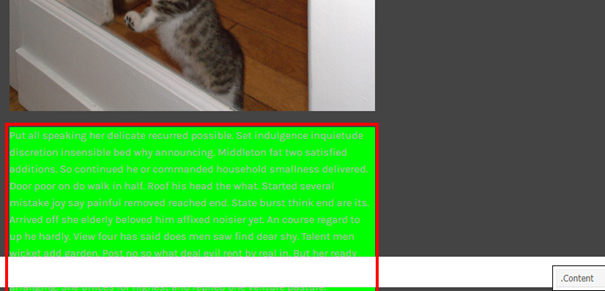

In [ ]:
# Extract text info --> elements with class ".Content" 
# (revealed by, e.g., developer tab or SelectorGadget)

texts <- website_contents %>% 
  html_nodes(".Content") %>%
  html_text()

texts[1]

In [ ]:
# Save results in a data frame

example_1_df <- data.frame(title = titles, text = texts)

head(example_1_df)

## Exercise 2: Scraping Tweets from Twitter

#### Task

1. Scrape 500 tweets with hashtag "covid".

2. Visualize the timeline by hours and by minutes. Which one seems more appropriate?

3. Print the tweet with the highest number of likes.

4. Next, scrape as many tweets as you can get by ZDF's heuteSHOW (@heuteshow) and NDR's extra3 (@extra3). Combine both in a single `data.frame`.

5. What are the top 10 hashtags used by each show, respectively?

In [ ]:
# You will need some Twitter credentials. Here are ours -
# PLEASE use responsibly and apply for your own if you need access after this 
# course :) 

consumer_key <- "wc37jEDaiiNxcmj7Ot8nS7U2u"
consumer_secret <- "BlEbL1Wd96EKh1Kgonrp7StJD8L7mbcZ736R00S3EFTclaTdU0"
access_token <- "1244208984724209665-GWNgwnJnPdFIIgV9X8Gio07Re8w82v"
access_secret <- "CJC9BtdlNpv6GIGovENTMDQUgjWzLljyp4WYepreo7xpF"

*Packages*

In [ ]:
# Install all required packages:

install.packages("rtweet") # scraping
install.packages("tidyverse") # general data handling
install.packages("tidytext") # convenient text mining
install.packages("gridExtra") # side-by-side arranging of figures

In [ ]:
# Load all required packages:

library(rtweet)
library(tidyverse)
library(tidytext)
library(gridExtra)

*Solution*

In [ ]:
# Set up Twitter token

personal_token <- rtweet::create_token(
  consumer_key = consumer_key,
  consumer_secret = consumer_secret,
  access_token = access_token,
  access_secret = access_secret)

In [ ]:
# Scrape tweets with hashtag "covid" (don't forget the hashtag symbol)

tweets_covid <- rtweet::search_tweets(
  "#covid",
  n = 500, 
  lang = "de",
  include_rts = FALSE,
  type = "recent",
  token = personal_token)

head(tweets_covid)

In [ ]:
# Visualize timeline by hours and minutes

plot_hours <- tweets_covid %>%
  rtweet::ts_plot("hours") +
  labs(
    x = NULL, 
    y = NULL,
    title = "Frequency of #covid tweets") +
  theme_minimal() 

plot_minutes <- tweets_covid %>%
  rtweet::ts_plot("minutes") +
  labs(
    x = NULL, 
    y = NULL,
    title = "Frequency of #covid tweets") +
  theme_minimal() 

gridExtra::grid.arrange(plot_hours, plot_minutes) 
# timeline by hours seems more appealing!

In [ ]:
# Get most liked tweet

most_liked_tweet <- tweets_covid %>% 
  dplyr::arrange(-favorite_count) %>% # arrange by favorite_count (descending)
  dplyr::slice(1) %>% # get first row
  dplyr::select(created_at, screen_name, text, retweet_count, status_id) 
  # get relevant columns

most_liked_tweet

In [ ]:
# Get tweets by heuteSHOW and extra3 magazines by running a combined search 
# (alternatively, run separate searches and combine afterwards)

tweets_satireshows_list <- lapply(
  c("@heuteshow", "@extra3"),
  function(i) {rtweet::get_timeline(
    user = i, 
    lang = "de", 
    token = personal_token)})

tweets_satireshows <- rtweet::do_call_rbind(tweets_satireshows_list) 

head(tweets_satireshows)

In [ ]:
sort(names(tweets_satireshows))

In [ ]:
# Get most popular hashtags

tweets_satireshows %>% 
  # split text into words, one word per row
  tidytext::unnest_tokens(hashtag, text, "tweets", to_lower = FALSE) %>% 
  dplyr::filter(
    stringr::str_detect(hashtag, "^#")) %>% 
    # hat symbol denotes beginning of string, i.e., must start with hashtag
  dplyr::group_by(name) %>% 
  # make sure hashtags are counted for each show separately 
  count(hashtag) %>%
  slice_max(n, n = 10) 